# Clustering

Dans cet essai qui constitue le baseline des clusters pour le jeu de données, 

- Toutes les variables disponibles sont utilisées
- L'algorithme du k-means est utilisé (même si les variables ne sont pas tout à fait adéquates pour ce genre de méthode étant donné qu'elles sont binaires et ordinales plutôt que continues)

À la fin de cette étape, nous aurons : 

- Les valeurs des moyennes et ecart-type pour le scaling des variables (`03_pilot1_scale_origins.rds` et `03_pilot1_scale_ecarts_types.rds`)
- Le modèle de k-means (`03_pilot1_kmeans.rds`)
- Le fichier de données original augmenté des variables de cluster (`03_pilot1_2022.rds`)
- Un fichier csv (pour ouverture dans excel par exemple) qui contient la moyenne par cluster par variable afin de déterminer "à la main" quels sont les éléments distinctifs de chaque cluster (`03_pilot1_clusters_desc.csv`)

In [2]:
library(dplyr)
library(factoextra)

df_pilot_2025 <- readRDS(file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/02_pilot_2025.rds")

In [3]:
# Sélection des variables pour le clustering
source("03-0_variables.R")
df_pilot_2025_clust <- df_pilot_2025 %>% select(all_of(variables_clust)) %>% select(-id) %>%
tidyr::drop_na()

In [4]:
# Scaling des variables
df_scaled <- scale(df_pilot_2025_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

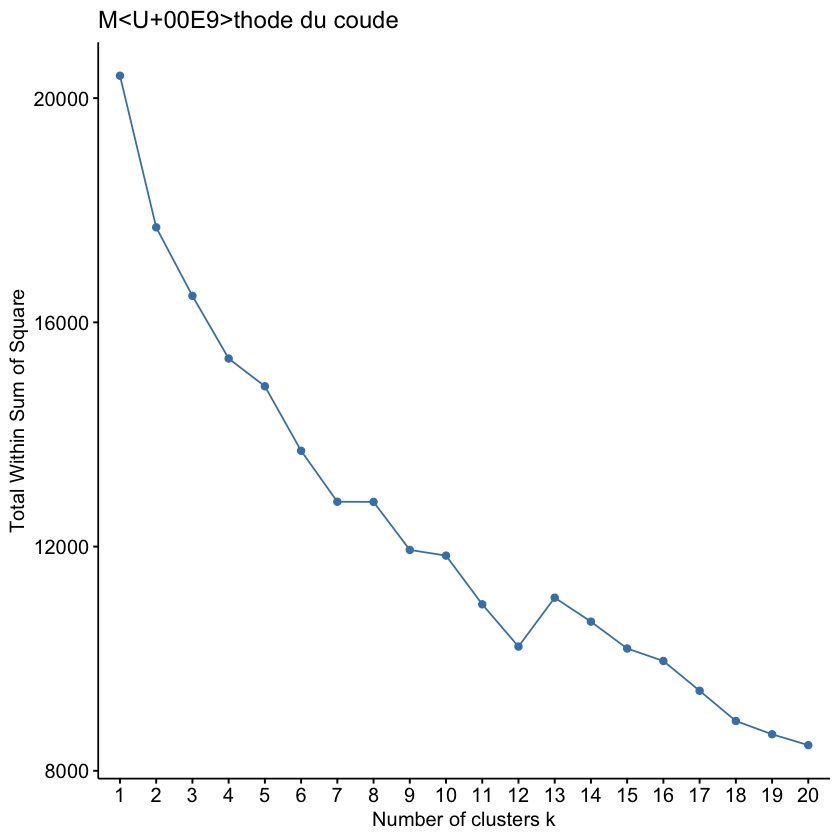

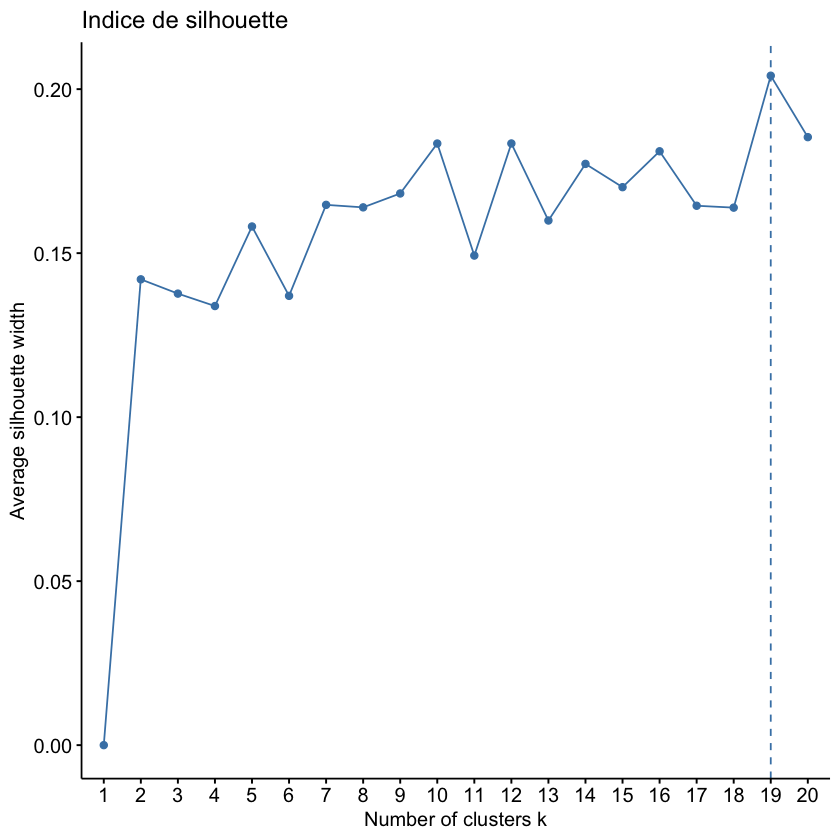

In [5]:
# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss", k.max = 20) +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette", k.max = 20) +
  ggtitle("Indice de silhouette")

In [6]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 12

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [7]:
kmeans_result

K-means clustering with 12 clusters of sizes 50, 37, 92, 57, 122, 37, 127, 122, 103, 61, 147, 66

Cluster means:
     ses_urban      ses_age ses_languageFrench ses_educBHS ses_educUniv
1  -0.40408645  0.261617585          0.5242541  1.00368521  -0.81202911
2  -0.58809718  0.171134831         -0.6538753  0.21258990  -0.33651586
3   0.08145407 -0.255637478          1.3618453 -0.14317541  -0.06101299
4   0.21207787 -0.300554717         -0.6538753 -0.34419204   0.33334155
5  -0.22850003  0.528192071          1.4563140 -0.09425089  -0.09457748
6  -0.08318968 -0.184333134         -0.2411172  0.14633401   0.15091230
7   0.05551632 -0.207233718         -0.6023385 -0.01434956   0.12489907
8   0.06074115 -0.001036687         -0.6181093 -0.25500288   0.25035120
9  -0.02763351 -0.054130834         -0.6538753  0.10259226  -0.13460387
10  0.04372696 -0.216648403         -0.6181093  0.08659510  -0.11100265
11  0.36294552  0.043632407         -0.6241920 -0.09930857   0.18554438
12 -0.21664166  0.03697

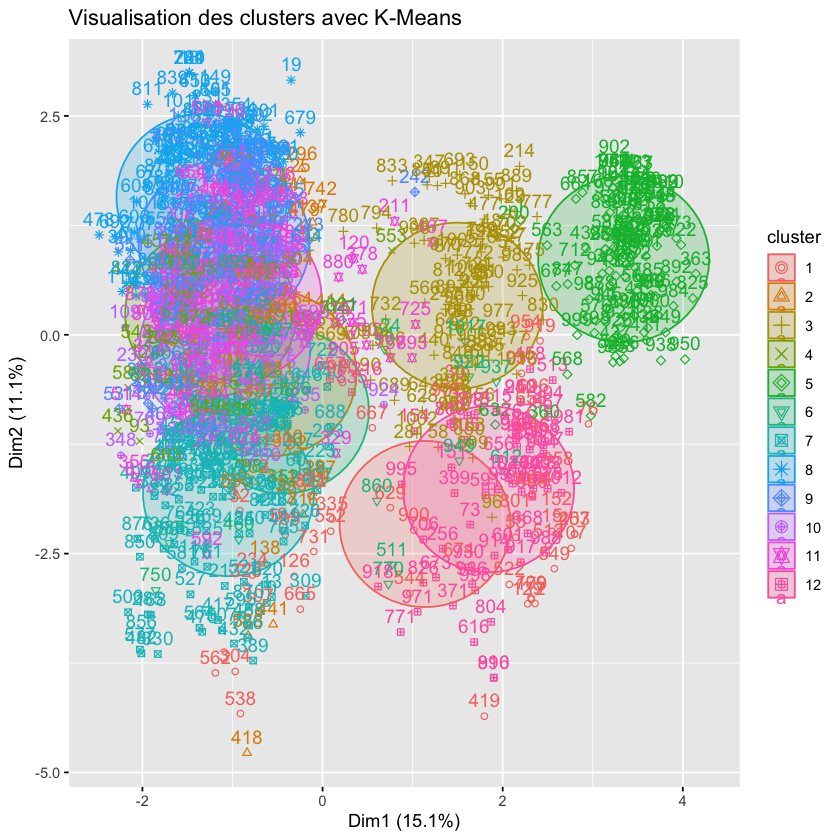

In [8]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [9]:
library(dplyr)
library(tidyr)

# Ajouter les clusters au dataframe original
df_pilot_2025$cluster <- as.factor(kmeans_result$cluster)

# Préparer les données pour pouvoir donner des noms aux clusters
df_pilot_2025 <- df_pilot_2025 %>%
  mutate(cluster_name = as.character(cluster))

# Créer des variables dummy
# Liste des clusters
clusters_uniques <- unique(df_pilot_2025$cluster)
# Création des variables
for (i in clusters_uniques) {
  df_pilot_2025[[paste0("cluster_", i)]] <- ifelse(df_pilot_2025$cluster == i, 1, 0)
}

In [10]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_origins.rds")
saveRDS(ecarts_types, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_kmeans.rds")
saveRDS(df_pilot_2025, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_2025.rds")